## 1. Dijkstra Example

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[('u', {}), ('w', {}), ('v', {}), ('y', {}), ('x', {}), ('z', {})]

[(('w', 'u'), 5), (('u', 'v'), 2), (('y', 'x'), 1), (('u', 'x'), 1), (('u', 'w'), 5), (('w', 'z'), 5), (('v', 'w'), 3), (('w', 'y'), 1), (('w', 'x'), 3), (('z', 'y'), 1), (('v', 'u'), 2), (('y', 'z'), 1), (('x', 'u'), 1), (('y', 'w'), 1), (('w', 'v'), 3), (('x', 'v'), 2), (('x', 'w'), 3), (('x', 'y'), 1), (('z', 'w'), 5), (('v', 'x'), 2)]

u 0.0
w 3.0
v 2.0
y 2.0
x 1.0
z 3.0


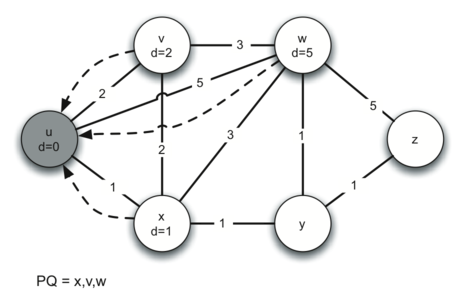

In [4]:
%load_ext autoreload
%autoreload

from graph import Graph
from dijkstra import DijkstraSolver
from IPython.display import Image

g = Graph()

for node in ["u", "y", "v", "x", "w", "y", "z"]:
    g.add_node(node)

g.add_bi_edge("u", "v", 2)
g.add_bi_edge("u", "x", 1)
g.add_bi_edge("u", "w", 5)

g.add_bi_edge("v", "x", 2)
g.add_bi_edge("v", "w", 3)

g.add_bi_edge("x", "w", 3)
g.add_bi_edge("x", "y", 1)

g.add_bi_edge("w", "z", 5)
g.add_bi_edge("w", "y", 1)
g.add_bi_edge("y", "z", 1)

print list(g.iternodes())
print
print list(g.iteredges())
print

solver = DijkstraSolver(g)

for node, dist in solver.shortest_paths("u"):
    print node, dist

Image(filename="graph_1.png", width=300)

## 1.2 A-star Example

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


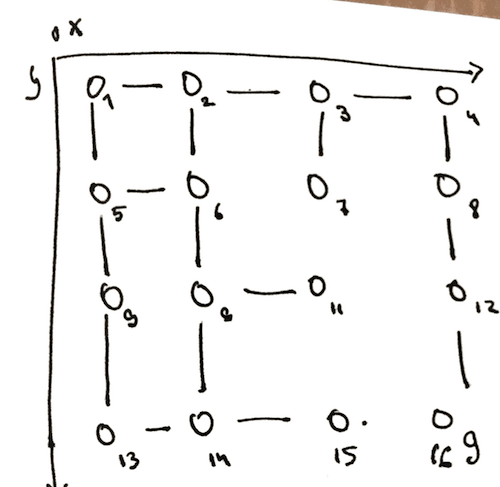

In [10]:
%load_ext autoreload
%autoreload

from graph import Graph
from astar import AStarSolver
from IPython.display import Image

Image(filename="graph_2.png", width=300)

In [11]:
g = Graph()

for y in xrange(0, 4):
    for x in xrange(1, 5):
        node = y * 4 + x
        print node, {"x": x, "y": y+1}
        g.add_node(node, x=x, y=y+1)

# 1
g.add_bi_edge(1,2)
g.add_bi_edge(1,5)

# 2
g.add_bi_edge(2,6)
g.add_bi_edge(2,3)

# 3
g.add_bi_edge(3,7)
g.add_bi_edge(3,4)

# 4
g.add_bi_edge(4,8)

# 5
g.add_bi_edge(5,9)
g.add_bi_edge(5,6)

# 6
g.add_bi_edge(6,10)

# 7

# 8
g.add_bi_edge(8, 12)

# 9
g.add_bi_edge(9, 13)

# 10
g.add_bi_edge(10, 14)
g.add_bi_edge(10, 11)

# 11

# 12
g.add_bi_edge(12, 16)

# 13
g.add_bi_edge(13, 14)

# 14
g.add_bi_edge(14, 15)

# 15

# 16


def greedy_h(n1, n2):
    return abs(n1["x"] - n2["x"]) + abs(n1["y"] - n2["y"])

def dijkstra_h(n1, n2):
    return 0.0

astar_greedy_solver = AStarSolver(g, greedy_h)
astar_dijkstra_solver = AStarSolver(g, dijkstra_h)

print
print astar_greedy_solver.find_path(1, 16)
print
print astar_greedy_solver.find_path(4, 16)
print astar_dijkstra_solver.find_path(4, 16) # This should have more steps (3rd column)

1 {'y': 1, 'x': 1}
2 {'y': 1, 'x': 2}
3 {'y': 1, 'x': 3}
4 {'y': 1, 'x': 4}
5 {'y': 2, 'x': 1}
6 {'y': 2, 'x': 2}
7 {'y': 2, 'x': 3}
8 {'y': 2, 'x': 4}
9 {'y': 3, 'x': 1}
10 {'y': 3, 'x': 2}
11 {'y': 3, 'x': 3}
12 {'y': 3, 'x': 4}
13 {'y': 4, 'x': 1}
14 {'y': 4, 'x': 2}
15 {'y': 4, 'x': 3}
16 {'y': 4, 'x': 4}

(6.0, [1, 2, 3, 4, 8, 12, 16], 16)

(3.0, [4, 8, 12, 16], 4)
(3.0, [4, 8, 12, 16], 9)
